In [1]:
import numpy as np
# from numpy import sqrt
f_c = 3000
E_c = 57000*np.sqrt(f_c)

In [2]:
from collections import namedtuple
Point = namedtuple("Point","strain stress")
points = []
point = Point((f_c/2)/E_c, f_c/2)
points.append(point)
point = Point(0.0016, f_c)
points.append(point)
point = Point(0.003, 0.75*f_c)
points.append(point)

* Assume: The stress strain plot can be broken up into three functions.
* Assume: $f_0$ is a 1st order polynomial.
* Assume: $f_1$ is a 3nd order polynomial. 
* Assume: $f_2$ is a 2nd order polynomial.

$$f_0 = E_c x$$

$$f_1 = d_1 x^3 + a_1 x^2 +b_1 x +c_1$$

$$f_2 = a_2 x^2 +b_2 x +c_2$$

At point 0:
$$\frac{df_1}{dx} = 2 a_1 x + b_1$$

$$ 3 d_1 x_0^2 + 2 a_1 x_0 + b_1 = E_c$$

$$d_1 x_0^3 + a_1 x_0^2 +b_1 x_0 +c_1 = y_0$$

At point 1:
$$\frac{df_1}{dx} = \frac{df_2}{dx} $$
$$3 d_1 x_0^2 + 2 a_1 x_1 + b_1 = 2 a_2 x_1 + b_2= 0$$

$$d_1 x_0^3 + a_1 x_1^2 +b_1 x_1 +c_1 = a_2 x_1^2 +b_2 x_1 +c_2 = y_1$$

At point 2:
$$a_2 x_2^2 +b_2 x_2 +c_2 =  y_2$$


Combining:
$$d_1 x_0^3 + a_1 x_0^2 +b_1 x_0 +c_1 = y_0$$

$$2 a_1 x_0 + b_1 = E_c$$

$$2 a_1 x_1 + b_1 =  0$$

$$d_1 x_1^3 + a_1 x_1^2 +b_1 x_1 +c_1 = y_1$$

$$A_1 = \left[\begin{array}{cccc}x_0^3 &x_0^2 & x_0 & 1 \\ 3 x_0^2 & 2 x_0 & 1 & 0 \\3 x_1^2 & 2 x_1 & 1 & 0 \\ x_1^3 & x_1^2 & x_1 & 1 \\ \end{array}\right]$$
$$C_1 = \left[\begin{array}{c}d_1 \\ a_1 \\ b_1 \\ c_1\\ \end{array}\right]$$
$$Y_1 = \left[\begin{array}{c}0.5 f_c \\E_c \\ 0 \\ f_c\\\end{array}\right]$$

$$A_1 C_1 = Y_1$$
$$\therefore$$
$$ C_1 = A_1^{-1} Y_1$$


In [3]:
from numpy.linalg import inv
x_0, y_0 = points[0]
x_1, y_1 = points[1]
A_1 = np.matrix([[x_0**3,  x_0**2, x_0, 1],
                 [3*x_0**2,2*x_0,  1,   0],
                 [3*x_1**2,2*x_1,  1,   0],
                 [x_1**3,  x_1**2, x_1, 1]])
Y_1 = np.matrix([[y_0],[E_c],[0],[y_1]])
C_1 = inv(A_1)*Y_1
C_1

matrix([[  3.52927888e+11],
        [ -2.49570663e+09],
        [  5.27577503e+06],
        [ -4.97823708e+02]])

In [4]:
np.allclose(A_1*C_1,Y_1)

False

In [5]:
d_1, a_1, b_1, c_1 = map(float,C_1)
print((d_1, a_1, b_1, c_1))

(352927888358.18945, -2495706628.680458, 5275775.029186586, -497.82370799169666)


    >>> from numpy.linalg import inv
    >>> np.matrix([[1, 2], [3, 4]])
    matrix([[1, 2],
            [3, 4]])
            
    Solve the system of equations 3 * x0 + x1 = 9 and x0 + 2 * x1 = 8:
    >>>

    >>> a = np.array([[3,1], [1,2]])
    >>> b = np.array([9,8])
    >>> x = np.linalg.solve(a, b)
    >>> x
    array([ 2.,  3.])



At point 1:
$$ 2 a_2 x_1 + b_2= 0$$

$$a_2 x_1^2 +b_2 x_1 +c_2 = y_1$$

At point 2:
$$a_2 x_2^2 +b_2 x_2 +c_2 =  y_2$$

$$A_2 = \left[\begin{array}{ccc}0 & 2 x_1 &1 \\ x_1^2 & x_1 &1 \\ x_2^2 & x_2 &1 \\ \end{array} \right]$$
$$C_2 = \left[\begin{array}{c}a  \\ b \\ c \\ \end{array} \right]$$
$$Y_2 = \left[\begin{array}{c}0  \\ f_c \\ 0.75 f_c \\ \end{array} \right]$$

$$A_2 C_2 = Y_2$$
$$\therefore$$
$$ C_2 = A_2^{-1} Y_2$$

In [6]:
points

[Point(strain=0.00048045838377646147, stress=1500.0),
 Point(strain=0.0016, stress=3000),
 Point(strain=0.003, stress=2250.0)]

In [7]:
x_1, y_1 = points[1]
x_2, y_2 = points[2]
A_2 = np.matrix([[2*x_1, 1,0],[x_1**2, x_1, 1],[x_2**2, x_2, 1]])
Y_2 = np.matrix([[0],[y_1],[y_2]])
C_2 = inv(A_2)*Y_2
C_2

matrix([[ -3.82653061e+08],
        [  1.22448980e+06],
        [  2.02040816e+03]])

In [8]:
np.allclose(A_2*C_2,Y_2)

True

In [9]:
a_2, b_2, c_2 = map(float,C_2)
print((a_2, b_2, c_2))

(-382653061.2244899, 1224489.7959183673, 2020.4081632653056)


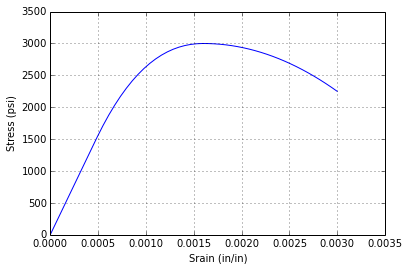

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def σ(ɛ):
    if ɛ < x_0:
        s = E_c * ɛ
    elif x_0 <= ɛ < x_1:
        s = d_1 * ɛ**3 + a_1 * ɛ**2 + b_1 * ɛ + c_1
    elif x_1 <= ɛ :
        s = a_2 * ɛ**2 + b_2 * ɛ + c_2
    return s

x = np.linspace(0, 300) / 100000
y = [σ(ɛ) for ɛ in x]

plt.plot(x, y)
plt.grid(True)
plt.ylim(0,y_1+500)
plt.xlim(0,0.0035)
plt.ylabel("Stress (psi)")
plt.xlabel("Srain (in/in)")
plt.savefig("Stress-Strain.svg")
plt.show()

In [14]:
plt.savefig("Stress-Strain.png")